In [116]:

# Constants
r = 1.0  # Constant g/sec
D = 0.2# Diffusion coefficient
xo, yo, zo = 10, 10, 1.5  # Initial coordinates

# Define the function for concentration
def concentration(x, y, z, t):
    return (r / (4 * D * np.pi * t)**1.5) * np.exp(-((x - xo)**2 + (y - yo)**2 + (z - zo)**2) / (4 * D * t))

<Figure size 640x480 with 0 Axes>

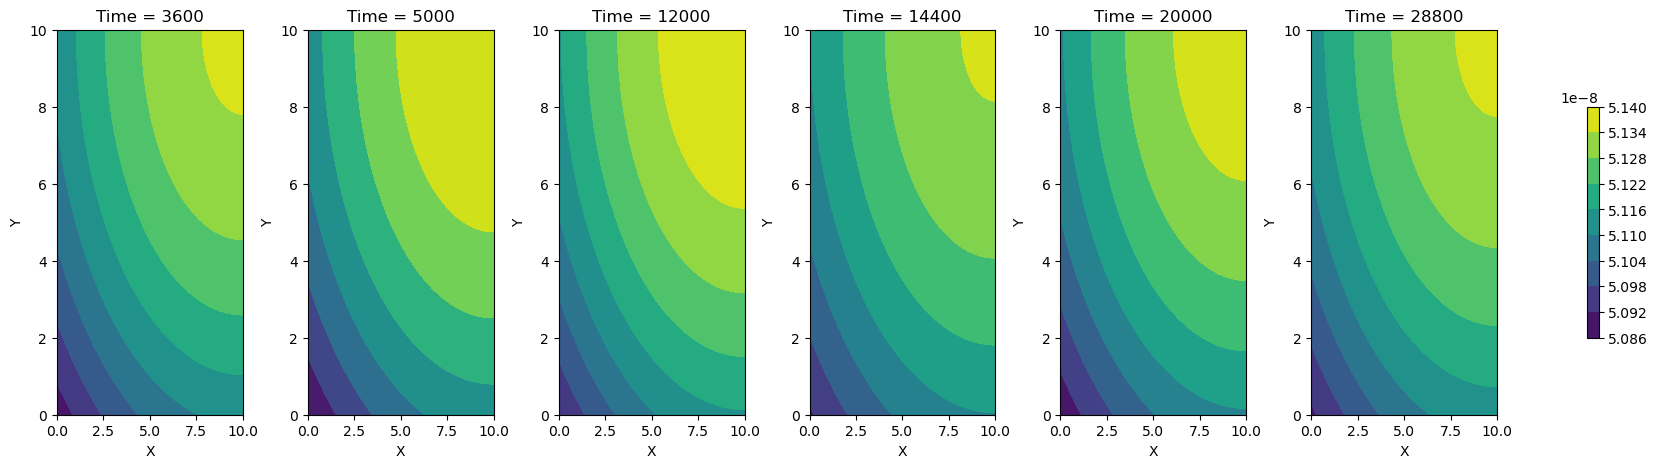

In [117]:
import numpy as np
import matplotlib.pyplot as plt


# Create a grid of x, y, z values
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
z = np.linspace(0,3, 100)
X, Y, Z = np.meshgrid(x, y, z)

# Plot concentration at different times
times = [3600,5000,12000,14400,20000,28800]
plt.figure()


# Create subplots
fig, axes = plt.subplots(1, len(times), figsize=(20, 5))

for i, t in enumerate(times):
    C = concentration(X, Y, Z, t)
    ax = axes[i]
    contour = ax.contourf(X[:, :, 50], Y[:, :, 50], C[:, :, 50])
    ax.set_title(f'Time = {t}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Adjust subplot parameters to avoid overlap
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.35, hspace=0.35)
fig.colorbar(contour, ax=axes.ravel().tolist(), shrink=0.6)  # Adding a single colorbar for all subplots
plt.show()


In [118]:
def probability_density(x, y, Lx, Ly, sigma_bed=2, sigma_table=1.5):
    # Bed centered at (Lx/2, 0)
    xc_bed, yc_bed = Lx / 2, 0
    rho_bed = (1 / (2 * np.pi * sigma_bed**2)) * np.exp(-((x - xc_bed)**2 + (y - yc_bed)**2) / (2 * sigma_bed**2))
    
    # Table at the opposite corner (Lx, Ly)
    xc_table, yc_table = Lx, Ly
    rho_table = (1 / (2 * np.pi * sigma_table**2)) * np.exp(-((x - xc_table)**2 + (y - yc_table)**2) / (2 * sigma_table**2))
    
    # Sum of densities (not normalized)
    return rho_bed + rho_table


In [119]:
from scipy.integrate import dblquad
def integrand(y, x):
    return probability_density(x, y, Lx, Ly)

# Perform double integration over the area of the room
integral_result, error = dblquad(integrand, 0, Ly, lambda x: 0, lambda x: Lx)
integral_result, error

(0.7437900515695888, 1.4554553157914768e-08)

In [120]:
def normalized_probability_density(x, y, Lx, Ly, sigma_bed=2, sigma_table=1.5):
    integral = integral_result  # The result from the integration
    return probability_density(x, y, Lx, Ly, sigma_bed, sigma_table) / integral


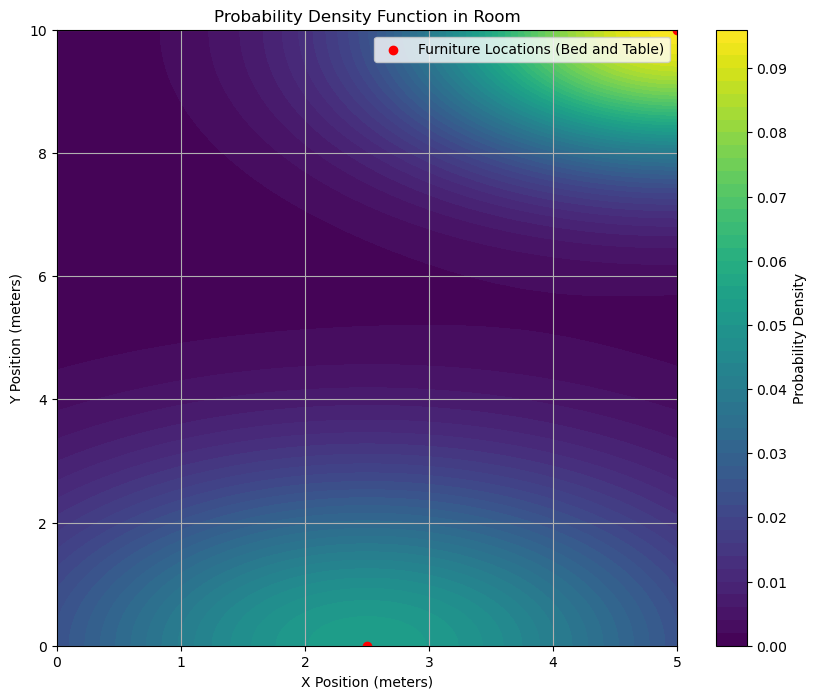

In [147]:
# Parameters
Lx, Ly = 5, 10  # Room dimensions

# Grid setup for x and y
x = np.linspace(0, Lx, 100)
y = np.linspace(0, Ly, 100)
X, Y = np.meshgrid(x, y)

# Compute the probability density with expanded spreads
Z_expanded = normalized_probability_density(X, Y, Lx, Ly)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z_expanded, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.scatter([Lx/2, Lx], [0, Ly], color='red', label='Furniture Locations (Bed and Table)')
plt.xlabel('X Position (meters)')
plt.ylabel('Y Position (meters)')
plt.title('Probability Density Function in Room')
plt.legend()
plt.grid(True)
plt.show()


In [143]:


# Constants
T = 3600  # Total time in seconds (e.g., 1 hour)
Lx, Ly, Lz = 10, 10, 3  # Room dimensions
z_fixed = 1.5  # Breathing height in meters

# Concentration calculation for a fixed z over time
def total_inhaled(D, r, T, Lx, Ly, z_fixed, sigma_bed, sigma_table):
    # Time and space grids
    dx, dy = 0.1, 0.1  # Spatial step
    dt = 100  # Time step in seconds
    x = np.arange(0, Lx, dx)
    y = np.arange(0, Ly, dy)
    t = np.arange(dt, T+dt, dt)  # Start from dt because t=0 leads to singularity in concentration
    
    # Meshgrids for calculations
    X, Y = np.meshgrid(x, y)
    total_inhalation = 0

    # Time integration
    for ti in t:
        C = concentration(X, Y, np.full_like(X, z_fixed), ti)
        rho = normalized_probability_density(X, Y, Lx, Ly, sigma_bed, sigma_table)
        total_inhalation += np.sum(C * rho) * dx * dy * dt  # Riemann sum approximation

    return total_inhalation

# Assuming the person is always at breathing height
inhaled_amount = total_inhaled(D=0.2, r=1.0, T=3600, Lx=10, Ly=10, z_fixed=1.5, sigma_bed=5, sigma_table=3)
inhaled_amount



0.032367324676361005

In [146]:
# Constants for 24 hours
T_24_hours = 86400  # Total time in seconds for 24 hours

# Calculate the inhaled amount over 24 hours
inhaled_amount_24_hours = total_inhaled(D=0.2, r=1, T=T_24_hours, Lx=10, Ly=10, z_fixed=1.5, sigma_bed=2, sigma_table=1.5)
inhaled_amount_24_hours


0.04524423594287784

In [ ]:
# final ans grams of repellent inhaled